In [1]:
%pip install pystan

  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.2-py3-none-any.whl (13 kB)
  Using cached pystan-3.0.1-py3-none-any.whl (12 kB)
  Using cached pystan-3.0.0-py3-none-any.whl (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\DELL\AppData\Local\Temp\pip-install-_amh0mzo\pystan_a436a5b6746d4e919d9583eac8aaa5b0\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
%pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas_datareader as web  
import pandas as pd 

In [5]:
import datetime as dt

In [6]:
start  = dt.datetime(2020 , 1,1) 
end  = dt.datetime.now()

In [7]:
data = web.DataReader("TSLA" , "yahoo" ,start  ,end )

In [8]:
data.to_csv("stock_data.csv")

In [9]:
data = pd.read_csv("stock_data.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,28.086000,26.805332,27.000000,27.888666,154285500.0,27.888666
1,2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500.0,28.684000
2,2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500.0,29.534000
3,2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000.0,30.102667
4,2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500.0,31.270666


In [10]:
data = data[["Date" , "Close"]]


In [11]:
data.columns = ["ds" , "y"]

In [12]:
data

,ds,y
0,2019-12-31,27.888666
1,2020-01-02,28.684000
2,2020-01-03,29.534000
3,2020-01-06,30.102667
4,2020-01-07,31.270666
...,...,...
709,2022-10-24,211.250000
710,2022-10-25,222.419998
711,2022-10-26,224.639999
712,2022-10-27,225.089996


In [13]:
from tqdm.notebook import tqdm

In [14]:
from prophet import Prophet

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
m  = Prophet() 
m.fit(data)

11:15:28 - cmdstanpy - INFO - Chain [1] start processing
11:15:28 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = m.make_future_dataframe(periods= 365) 
future.tail()

,ds
1074,2023-10-24
1075,2023-10-25
1076,2023-10-26
1077,2023-10-27
1078,2023-10-28


In [17]:
forecast = m.predict(future) 
forecast[['ds' , 'yhat'  , 'yhat_lower' , 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1074,2023-10-24,235.764265,190.060642,283.167848
1075,2023-10-25,238.890654,192.988771,285.970820
1076,2023-10-26,240.502050,191.341862,285.412682
1077,2023-10-27,242.561864,193.474209,287.252137
1078,2023-10-28,271.997829,226.403722,315.013644


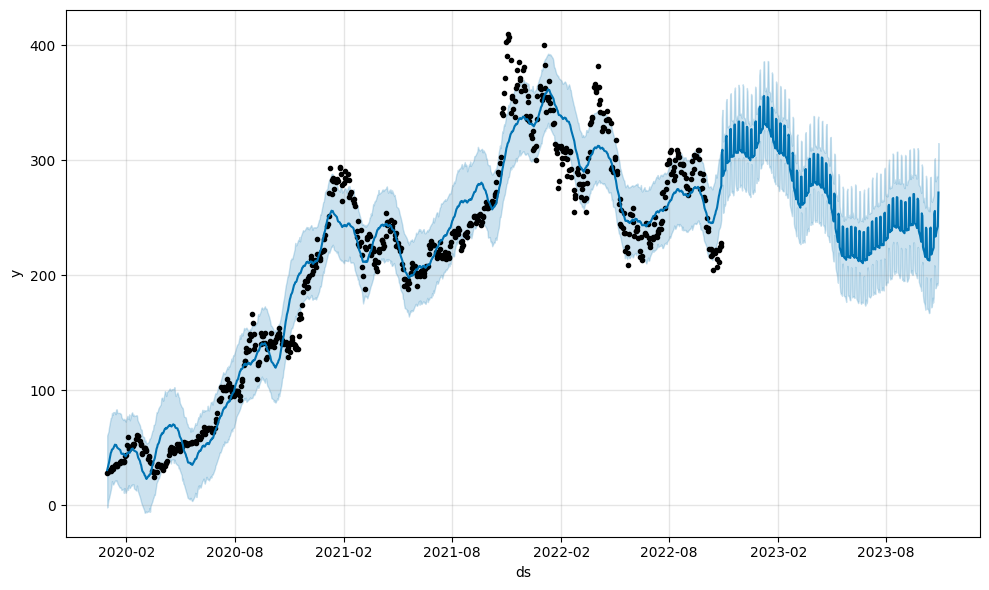

In [18]:
fig1 = m.plot(forecast)

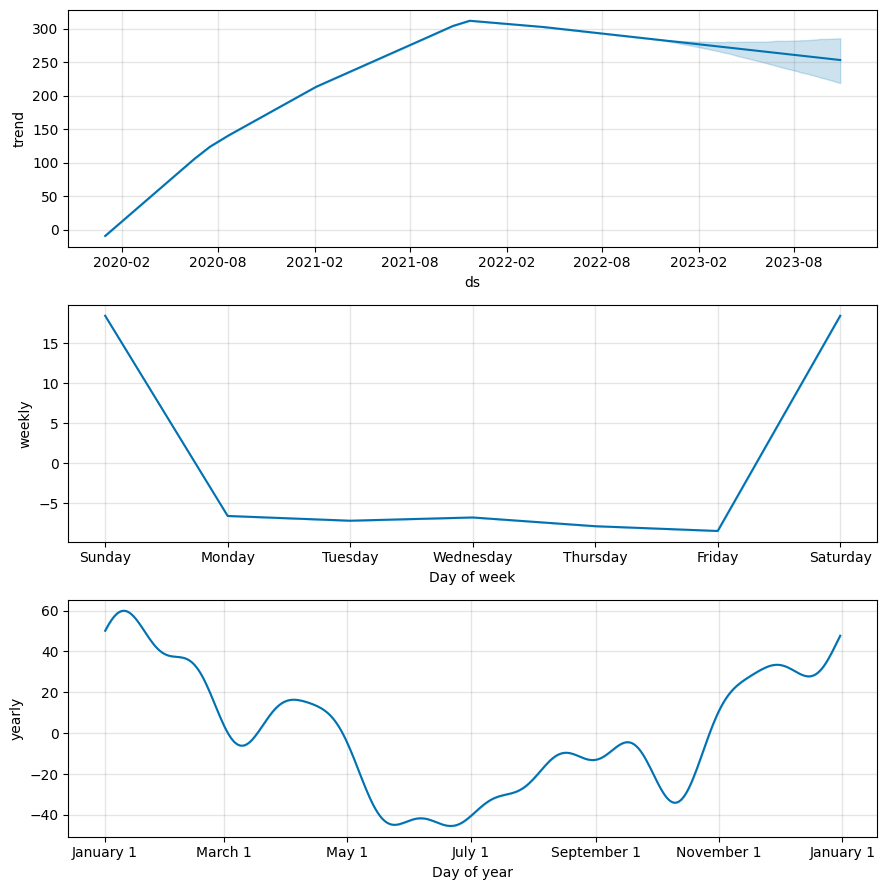

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [21]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install nbformat 

Note: you may need to restart the kernel to use updated packages.


In [23]:
from prophet.plot import plot_plotly , plot_components_plotly
plot_plotly(m , forecast)

In [24]:
plot_components_plotly(m , forecast)